In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm #to create progress bar
import cv2 
import os

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



### Constants

In [11]:
import os
import  imageio.v2 as imageio
import pandas as pd

In [ ]:

#os.chdir('F:\\akash\\CS539_project\\landsat_dhi\\rough')
os.chdir('F:\\akash\\CNN\\CNN_inputs\\')
absent = os.listdir("absent_50x50") #absent_50x50
present = os.listdir("present_50x50") #present_50x50
absentVec = []
presentVec = []
for img in absent:
       img = imageio.imread(f"absent_50x50/{img}")
       ar = img.flatten()
       absentVec.append(ar)    
absentdf = pd.DataFrame(absent)    
absentdf.insert(loc=0,column ="label",value=1)

for img in present:
       img = imageio.imread(f"present_50x50/{img}")
       ar = img.flatten()
       presentVec.append(ar)    
presentdf = pd.DataFrame(presentVec)    
presentdf.insert(loc=0,column ="label",value=0)

In [341]:
data = pd.concat([absentdf,presentdf])      
data = data.sample(frac=1)
data.shape

(2125, 60001)

In [342]:
data_train = data.drop('label',axis=1)
data_train.shape
X = np.array(data_train)
X = X.reshape(-1,50,50,24)  #-1 = 234 here, the no of the points
X.shape

(2125, 50, 50, 24)

In [343]:
from sklearn.model_selection import train_test_split
y = data.label
#x = data.drop('label',axis=1)

x_train,x_test,y_train,y_test=train_test_split(X[:,:,:,1:21],y,test_size=0.3)

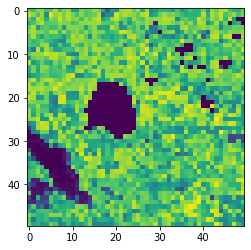

In [262]:
plt.imshow(X[1,:,:,21])

In [344]:
x_train.shape

(1487, 50, 50, 20)

In [435]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(50,50,20)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(8, 8),strides=8))


model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(8, 8)))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(200, activation='relu')) #relu
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax')) # 5 because we have 5 classes

model.compile(loss='binary_crossentropy', optimizer="rmsprop",metrics=['accuracy'])

model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_210 (Conv2D)          (None, 48, 48, 16)        2896      
_________________________________________________________________
batch_normalization_195 (Bat (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 2, 2, 32)          12832     
_________________________________________________________________
batch_normalization_196 (Bat (None, 2, 2, 32)          128       
_________________________________________________________________
flatten_46 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 200)             

In [347]:
np.any(np.isnan(y_test))

False

In [436]:
tf.debugging.set_log_device_placement(True)
opt = tf.keras.optimizers.SGD(learning_rate=0.005)
model.compile(optimizer=opt,  # 'adam'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
47/47 [==============================] - 46s 826ms/step - loss: 0.6409 - accuracy: 0.8070 - val_loss: 0.5991 - val_accuracy: 0.8056
Epoch 2/10
47/47 [==============================] - 25s 533ms/step - loss: 0.5686 - accuracy: 0.8151 - val_loss: 0.5508 - val_accuracy: 0.8056
Epoch 3/10
47/47 [==============================] - 34s 710ms/step - loss: 0.5299 - accuracy: 0.8151 - val_loss: 0.5244 - val_accuracy: 0.8056
Epoch 4/10
47/47 [==============================] - 26s 556ms/step - loss: 0.5082 - accuracy: 0.8151 - val_loss: 0.5102 - val_accuracy: 0.8056
Epoch 5/10
47/47 [==============================] - 27s 571ms/step - loss: 0.4964 - accuracy: 0.8151 - val_loss: 0.5023 - val_accuracy: 0.8056
Epoch 6/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4892 - accuracy: 0.8151 - val_loss: 0.4978 - val_accuracy: 0.8056
Epoch 7/10
47/47 [==============================] - 25s 531ms/step - loss: 0.4853 - accuracy: 0.8151 - val_loss: 0.4953 - val_accuracy: 0.8056

20/20 - 1s - loss: 0.4927 - accuracy: 0.8056


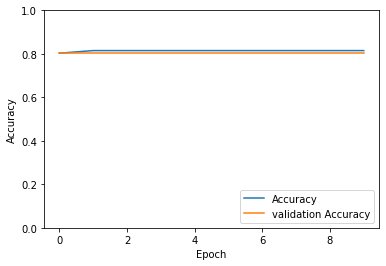

In [430]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

20/20 - 0s - loss: 0.4927 - accuracy: 0.8056


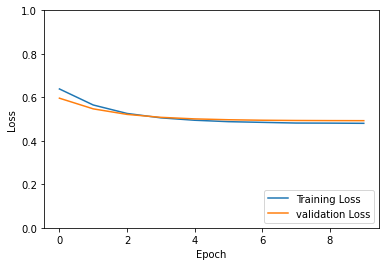

In [432]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)